<a href="https://colab.research.google.com/github/carlosrivero24-sys/Inteligencia_Artificial/blob/main/MultiCapa/Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)
#Importamos numpy y pandas y generamos datos random para poder clasificar mejor y creamos una tabla

In [ ]:
df
#Observamos nuestra tabla creada aleatoriamente

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,89,87,98,83,100,96,90,78,87,68,73,85,68,72,72,51,64,77
1,96,78,92,87,83,98,84,87,63,74,66,90,60,56,76,51,75,63
2,93,78,91,77,77,83,85,77,88,71,71,82,59,59,77,80,75,78
3,89,82,77,80,71,72,69,67,79,62,73,61,85,62,81,62,69,56
4,88,72,83,86,74,79,87,75,70,70,83,87,59,69,59,51,51,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,92,93,97,78,99,79,90,70,65,77,82,74,60,80,75,73,70,73
4996,89,85,90,98,94,87,68,61,88,81,71,74,58,55,70,55,55,76
4997,76,100,72,75,96,80,71,67,86,77,69,75,68,54,84,73,57,53
4998,79,97,89,71,87,75,65,77,85,61,64,71,77,58,77,79,79,78


In [ ]:
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values
#Calculamos promedios de los tegnologicos matematicos y psicologicos y promedios generales

In [ ]:
y
#Observamos nuestra Y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [False,  True]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
##Aqui se dividen los valores de en un lado los de train que son los de entrenamiento y por otro lado los de test que son de prueba Y ocupamos escalamiento

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#Importamos nuestro modelo de red neuronal que es Sequential y nuestras capas, le pedimos que tenga tres capas ocultas y una de salida
##Se compila el modelo utilizando  Adam y nos da la función de pérdida (categorical_crossentropy) para la clasificación.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose=1
)
#Entrenamos a nuestro modelo con 50 epocas

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9856 - loss: 0.1011 - val_accuracy: 0.9670 - val_loss: 0.0814
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9889 - loss: 0.0289 - val_accuracy: 0.9680 - val_loss: 0.1097
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9760 - val_loss: 0.0671
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9915 - loss: 0.0367 - val_accuracy: 0.9790 - val_loss: 0.0495
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9927 - loss: 0.0238 - val_accuracy: 0.9810 - val_loss: 0.0694
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9921 - loss: 0.0299 - val_accuracy: 0.9730 - val_loss: 0.0958
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9903 - loss: 0.0225 - val_accuracy: 0.9750 - val_loss: 0.0851
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9934 - loss: 0

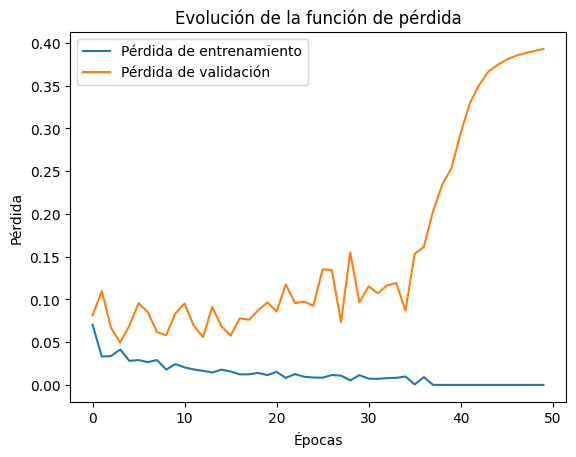

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.4234

🔹 Loss: 0.3931  |  Accuracy: 0.9770


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")
## Importamos matplotlib.pyplot para poder graficar nuestra funcion de perdida donde tenemos nuestra perdida de entrenamiento y perdida de validacion

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


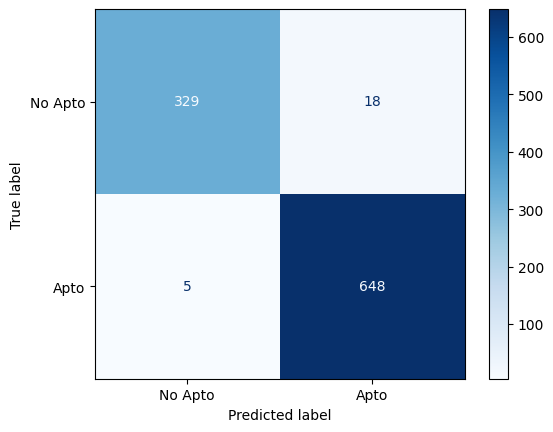


Sensitivity (Recall) por clase:
No Apto: 0.95
Apto: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")
#Se calculan las predicciones del modelo en el conjunto de prueba y se obtienen clases. Se calcula la matriz de confusión utilizando confusion_matrix.